# Imports and Setup

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import os

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported and environment set up!")

Libraries imported and environment set up!


# Dataset Loading

In [30]:
# Load dataset from app/data/dataset-asd.csv
print("Loading dataset...")
dir_path = 'C:/Users\mahes/OneDrive/Desktop/FinalYearProjects/Projects/ASD-Detection-App/app/'
data_path = dir_path + "data/dataset-asd.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please ensure it's in app/data/.")
df = pd.read_csv(data_path)
print("Dataset loaded successfully!")
print("\nDataset Preview:")
display(df.head())

Loading dataset...
Dataset loaded successfully!

Dataset Preview:


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


# Data Preprocessing

In [31]:
# Preprocessing the dataset
print("Preprocessing data...")

# Encode categorical variables (based on quiz.py mappings)
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})
df['Jaundice'] = df['Jaundice'].map({'yes': 1, 'no': 0})
df['Family_mem_with_ASD'] = df['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
ethnicity_map = {
    'asian': 0, 'black': 1, 'hispanic': 2, 'latino': 3, 'middle eastern': 4, 'mixed': 5, 
    'native indian': 6, 'pacifica': 7, 'south asian': 8, 'white european': 9, 'unknown': 10
}
df['Ethnicity'] = df['Ethnicity'].str.lower().map(ethnicity_map).fillna(10)

# Handle missing values
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Define features and target
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 
            'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Ethnicity']
X = df[features]
y = df['Class/ASD Traits '].map({'Yes': 1, 'No': 0})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split: 80% train, 20% test")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Preprocessing data...
Data split: 80% train, 20% test
Training samples: 844, Testing samples: 211


C:\Users\mahes\AppData\Local\Temp\ipykernel_15552\3761156223.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\mahes\AppData\Local\Temp\ipykernel_15552\3761156223.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Visualization - Bar Plot

Generating bar plot...
Bar plot saved as 'app/asd_distribution.png'


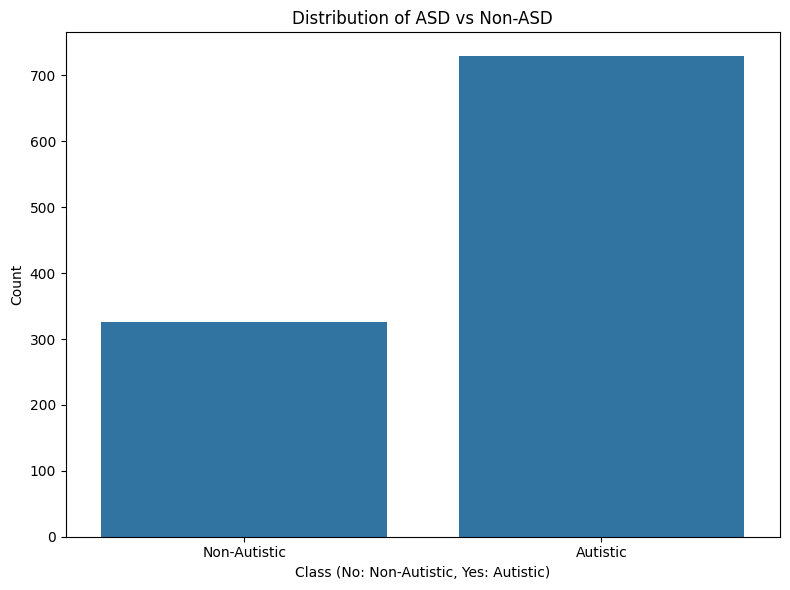

In [48]:
# Visualize ASD vs Non-ASD distribution
print("Generating bar plot...")
plt.figure(figsize=(8, 6))
sns.countplot(x='Class/ASD Traits ', data=df)
plt.title("Distribution of ASD vs Non-ASD")
plt.xlabel("Class (No: Non-Autistic, Yes: Autistic)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Autistic', 'Autistic'])
plt.tight_layout()
# plt.savefig("app/asd_distribution.png")
print("Bar plot saved as 'app/asd_distribution.png'")
plt.show()

# Train XGBoost Model

In [49]:
# Initialize and train XGBoost model
print("Initializing and training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)
print("Model training complete!")

Initializing and training XGBoost model...
Model training complete!


c:\Users\mahes\OneDrive\Desktop\FinalYearProjects\Projects\ASD-Detection-App\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Simulate Quiz Responses and Predict

In [50]:
# Simulate user quiz responses (mimicking quiz.py inputs)
print("Simulating quiz responses for prediction...")
user_answers = [
    "Sometimes", "Rarely", "Never", "Usually", "Always",  # A1-A5
    "Sometimes", "Rarely", "Never", "Usually",           # A6-A9
    "Delayed and unclear",                              # A10
    "3",                                               # Age in years
    "Male",                                            # Gender
    "Yes",                                             # Jaundice
    "No",                                              # Family history
    "White European",                                  # Ethnicity
    "Mother"                                           # Who completed (not used in prediction)
]

# Map answers to numerical values (from predict_autism function)
answers = {f'A{i+1}': ["Always", "Usually", "Sometimes", "Rarely", "Never"].index(ans) 
           for i, ans in enumerate(user_answers[:9])}
answers['A10'] = ["Clear and early", "Delayed but clear", "Delayed and unclear", "Still not speaking"].index(user_answers[9])
answers['Age_Mons'] = int(user_answers[10]) * 12  # Convert years to months
answers['Qchat-10-Score'] = sum(answers[f'A{i+1}'] for i in range(9)) + answers['A10']
answers['Sex'] = 1 if user_answers[11].lower() == "male" else 0
answers['Jaundice'] = 1 if user_answers[12].lower() == "yes" else 0
answers['Family_mem_with_ASD'] = 1 if user_answers[13].lower() == "yes" else 0
answers['Ethnicity'] = ethnicity_map.get(user_answers[14].lower(), 10)

# Prepare input DataFrame
input_data = pd.DataFrame([answers])

# Predict
prediction = xgb_model.predict(input_data)[0]
probability = xgb_model.predict_proba(input_data)[0][1]
print(f"Sample Prediction: {'Autistic' if prediction == 1 else 'Non-Autistic'} (Probability: {probability:.2f})")

# Test with a second example
user_answers_2 = [
    "Always", "Always", "Always", "Always", "Always",  # A1-A5
    "Always", "Always", "Always", "Always",           # A6-A9
    "Still not speaking",                             # A10
    "2",                                              # Age in years
    "Female",                                         # Gender
    "No",                                             # Jaundice
    "Yes",                                            # Family history
    "Asian",                                          # Ethnicity
    "Family Member"                                   # Who completed
]

answers_2 = {f'A{i+1}': ["Always", "Usually", "Sometimes", "Rarely", "Never"].index(ans) 
             for i, ans in enumerate(user_answers_2[:9])}
answers_2['A10'] = ["Clear and early", "Delayed but clear", "Delayed and unclear", "Still not speaking"].index(user_answers_2[9])
answers_2['Age_Mons'] = int(user_answers_2[10]) * 12
answers_2['Qchat-10-Score'] = sum(answers_2[f'A{i+1}'] for i in range(9)) + answers_2['A10']
answers_2['Sex'] = 1 if user_answers_2[11].lower() == "male" else 0
answers_2['Jaundice'] = 1 if user_answers_2[12].lower() == "yes" else 0
answers_2['Family_mem_with_ASD'] = 1 if user_answers_2[13].lower() == "yes" else 0
answers_2['Ethnicity'] = ethnicity_map.get(user_answers_2[14].lower(), 10)

input_data_2 = pd.DataFrame([answers_2])
prediction_2 = xgb_model.predict(input_data_2)[0]
probability_2 = xgb_model.predict_proba(input_data_2)[0][1]
print(f"Sample Prediction 2: {'Autistic' if prediction_2 == 1 else 'Non-Autistic'} (Probability: {probability_2:.2f})")

Simulating quiz responses for prediction...
Sample Prediction: Autistic (Probability: 1.00)
Sample Prediction 2: Non-Autistic (Probability: 0.00)


# Performance Metrics

Evaluating model performance...
Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


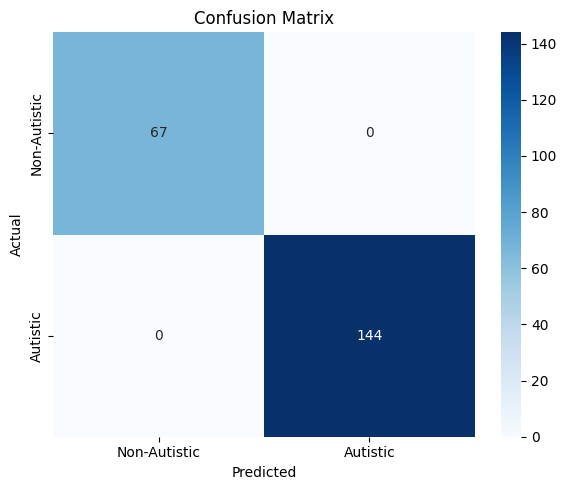

In [51]:
# Evaluate model performance on test set
print("Evaluating model performance...")
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Autistic', 'Autistic'], yticklabels=['Non-Autistic', 'Autistic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
# plt.savefig("app/confusion_matrix.png")
# print("Confusion matrix saved as 'app/confusion_matrix.png'")
plt.show()

In [46]:
# Ensure models directory exists and save the trained model
print("Saving the trained model...")
model_dir = dir_path + "models/"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist
model_path = os.path.join(model_dir, "xgb_model.pkl")
xgb_model.save_model(model_path)
print(f"Model saved to {model_path}")

Saving the trained model...
Model saved to C:/Users\mahes/OneDrive/Desktop/FinalYearProjects/Projects/ASD-Detection-App/app/models/xgb_model.pkl


c:\Users\mahes\OneDrive\Desktop\FinalYearProjects\Projects\ASD-Detection-App\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
